In [10]:
if (!require(survRM2)) install.packages('survRM2')
library('survRM2') 
if (!require(mvtnorm)) install.packages('mvtnorm')
library('mvtnorm')
if (!require(survival)) install.packages('survival')
library('survival')
if (!require(nph)) install.packages('nph')
library('nph')
if (!require(foreach)) install.packages("foreach")
library('foreach') 
if (!require(doParallel)) install.packages("doParallel")
library('doParallel')
if (!require(ggplot2)) install.packages("ggplot2")
library('ggplot2')
if (!require(cowplot)) install.packages("cowplot")
library('cowplot')
if (!require(IRdisplay)) install.packages("IRdisplay")
library('IRdisplay')

n_cores <- detectCores()
cluster <- makeCluster(14) # How many cores we use
registerDoParallel(cluster)
# multi thread
clusterEvalQ(cluster, #import packages to parallel 
  {
  library('survRM2')
  library('mvtnorm')
  library('survival')
  library('nph')
  library("simtrial")
  library("foreach")
  })

source('/home/r27user6/RMST_Code/Function.R')
clusterExport(cluster, "expo_gen_2stages")

display_javascript('
var cell = Jupyter.notebook.get_selected_cell();
cell.metadata.hide_output = true;
Jupyter.notebook.set_dirty(true);
')

[[1]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[2]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[3]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[4]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[5]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[8]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[9]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[10]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[11]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[12]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[13]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[14]]
 [1] "foreach"   "simtrial"  "nph"       "mvtnorm"   "survRM2"   "survival" 
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"

## Theoretical RMST ($\tau = 1$). No censoring

In [5]:
acc_time <- 1.67
cen_time <- 1
lambda_H0 <- 1.609
lambda_H1 <- 0.916

RMST_RSDST(lambda = lambda_H0, tau = 1)   # detail in Function file
RMST_RSDST(lambda = lambda_H1, tau = 1)

RMST,RSDST
<dbl>,<dbl>
0.4971488,0.1220925


RMST,RSDST
<dbl>,<dbl>
0.6548949,0.1273978


### RMST Estimation with censoring in interim 1 year

RMST of Control arm is: 0.3130104 
Variance of RMST estimation of Control arm is: 1.382051e-05 
RMST of Experiment arm is: 0.3769386 
Variance of RMST estimation of Experiment arm is: 1.697566e-05

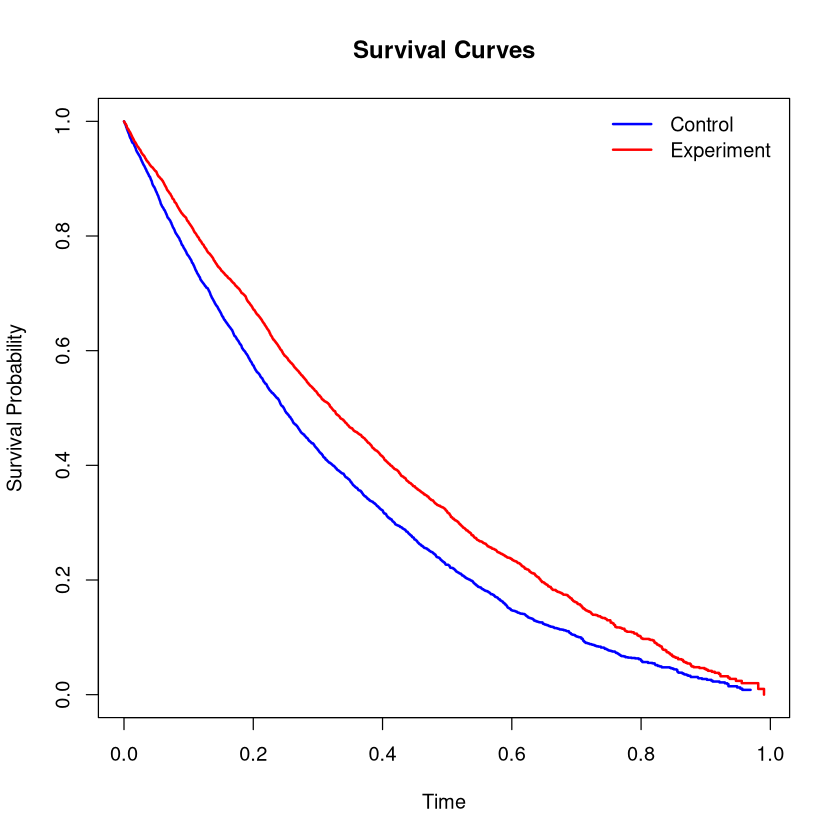

In [6]:
set.seed(2024)
data_C <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, 
                           dist = 'exp', cen_time = cen_time, arm = 0, interim = 1)[ , c(2,3,1)]
data_E <- expo_gen_2stages(N = 10000 ,acc_time = acc_time, lambda = lambda_H1, 
                           dist = 'exp', cen_time = cen_time, arm = 1, interim = 1)[ , c(2,3,1)]
pre_data <- rbind(data_C,data_E)
rmst_result_int <- rmst2(pre_data[,1], pre_data[,2], pre_data[,3],tau = 0.96)

cat('RMST of Control arm is:',rmst_result_int$RMST.arm0$rmst[1],'\n')
cat('Variance of RMST estimation of Control arm is:',rmst_result_int$RMST.arm0$rmst.var,'\n')
cat('RMST of Experiment arm is:',rmst_result_int$RMST.arm1$rmst[1],'\n')
cat('Variance of RMST estimation of Experiment arm is:',rmst_result_int$RMST.arm1$rmst.var)
fit <- survfit(Surv(pre_data[,1], pre_data[,2]) ~ pre_data[,3])
plot(fit, col = c("blue", "red"), lwd = 2, xlab = "Time", ylab = "Survival Probability", main = "Survival Curves")
legend("topright", legend = c("Control", "Experiment"), col = c("blue", "red"), lwd = 2, bty = "n")

### RMST Estimation with censoring in the whole 2 study

RMST of Control arm is: 0.4078671 
Variance of RMST estimation of Control arm is: 1.113824e-05 
RMST of Experiment arm is: 0.5360892 
Variance of RMST estimation of Experiment arm is: 1.372996e-05

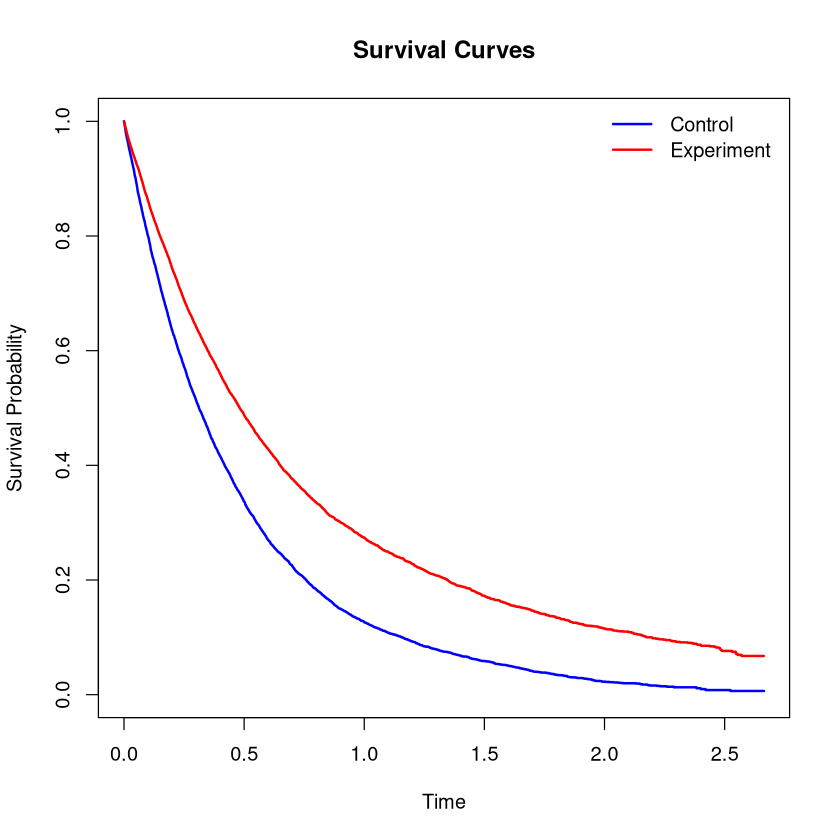

In [7]:
set.seed(2024)
data_C <- expo_gen_2stages(N = 10000, acc_time = acc_time, lambda = lambda_H0, 
                           dist = 'exp', cen_time = cen_time, arm = 0, interim = 1)[ , c(4,5,1)]
data_E <- expo_gen_2stages(N = 10000 ,acc_time = acc_time, lambda = lambda_H1, 
                           dist = 'exp', cen_time = cen_time, arm = 1, interim = 1)[ , c(4,5,1)]
pre_data <- rbind(data_C,data_E)
rmst_result_all <- rmst2(pre_data[,1], pre_data[,2], pre_data[,3],tau = 1)

cat('RMST of Control arm is:',rmst_result_all$RMST.arm0$rmst[1],'\n')
cat('Variance of RMST estimation of Control arm is:',rmst_result_all$RMST.arm0$rmst.var,'\n')
cat('RMST of Experiment arm is:',rmst_result_all$RMST.arm1$rmst[1],'\n')
cat('Variance of RMST estimation of Experiment arm is:',rmst_result_all$RMST.arm1$rmst.var)
fit <- survfit(Surv(pre_data[,1], pre_data[,2]) ~ pre_data[,3])
plot(fit, col = c("blue", "red"), lwd = 2, xlab = "Time", ylab = "Survival Probability", main = "Survival Curves")
legend("topright", legend = c("Control", "Experiment"), col = c("blue", "red"), lwd = 2, bty = "n")

# Prob of Early Termination by Normal integral:

### Use the normality of RMST to calculate the Prob of Early terminaton
###  $P(E(\tau_1) - C(\tau_1) > m1\ and\  E(\tau_1) > t1\ |H_0)$
### $(E-C,E)$ is bivariate normal. $E$ and $C$ are independent.
### The covariance matrix $\Sigma$ of $(E-C, E)$ can be easily obtained
### we set $m_1 = 0, t_1 = 0.3$ here 

In [8]:
mu_c <- rmst_result_int$RMST.arm0$rmst[1]
mu_e <- rmst_result_int$RMST.arm1$rmst[1]
var_c <- rmst_result_int$RMST.arm0$rmst.var
var_e <- rmst_result_int$RMST.arm1$rmst.var

mu_h0 <- c(0, mu_c)
sigma_h0 <- matrix(c(2*var_c, var_c, var_c, var_c), nrow = 2)
mu_h1 <- c(mu_e-mu_c, mu_e)
sigma_h1 <- matrix(c(var_e+var_c, var_e, var_e, var_c), nrow = 2)
upper <- c(Inf, Inf)

lower <- c(-0.19,0.33)
p_rj_h0 <- 1 - pmvnorm(lower, upper, mean = mu_h0, sigma = sigma_h0) # p(E-C>m1 & E>t1|H0)
p_rj_h1 <- 1 - pmvnorm(lower, upper, mean = mu_h1, sigma = sigma_h1)
cat(' PET0 =',p_rj_h0,'\n','PET1 =',p_rj_h1)

 PET0 = 0.9999976 
 PET1 = 0

### 10000 simulation (Same setting as Jung 2017)

In [78]:
sim_size <- 10000 
acc_time <- 1.67
cen_time <- 1
lambda_H0 <- 1.609
lambda_H1 <- 0.916
set.seed(2024)
n1 <- 31 
m1 <- -0.19
t1 <- 0.33

# Use the data in interim period
data_C <- foreach(k = 1:sim_size, .combine = 'rbind') %dopar% {
        expo_gen_2stages(N = n, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                         cen_time = cen_time,arm = 0, interim = interim)
                        }
data_E_H0 <- foreach(k = 1:sim_size, .combine = 'rbind') %dopar% {
        expo_gen_2stages(N = n, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                         cen_time = cen_time,arm = 1, interim = interim)
                        }   
data_E_H1 <- foreach(k = 1:sim_size, .combine = 'rbind') %dopar% {
        expo_gen_2stages(N = n, acc_time = acc_time, lambda = lambda_H1, dist = 'exp', 
                         cen_time = cen_time,arm = 1, interim = interim)
                        }     
rmst_h0 <- RMST_sim_cal(n = n1,data_E = data_E_H0[ , c(2,3,1)], data_C = data_C[ , c(2,3,1)],
                        tau = 2,sim_size = sim_size)
rmst_h1 <- RMST_sim_cal(n = n1,data_E = data_E_H1[ , c(2,3,1)], data_C = data_C[ , c(2,3,1)],
                        tau = 2,sim_size = sim_size)

proc_h0 <- sum((rmst_h0[2, ] - rmst_h0[1, ] > m1) & (rmst_h0[2, ] > t1))
proc_h1 <- sum((rmst_h1[2, ] - rmst_h1[1, ] > m1) & (rmst_h1[2, ] > t1))

cat(' Empirical PET0 =', 1-proc_h0/sim_size,'\n', 'Empirical PET1 = ',1-proc_h1/sim_size)

 Empirical PET0 = 0.7079 
 Empirical PET1 =  0.3796

### <font color=LightSeaGreen>The simulated value vary from the theoratical normal calculation.
### The censoring may affact the normality of RMST?

# 2 stages Experiment

### Setting: acc_time = 1.67, cen_time = 1, interim $\tau_1 = 1$
###  $H_0 : \lambda_0 = \lambda_1 = 1.609$    
###  $H_1 : \lambda_0 = 1.609,\ \lambda_1 = 0.916$  
### α = 0.1, power = 0.9. Sample size = 102 (51 per arm)   
### censoring dist in interim: $\tilde{C_i} \sim U[0,\tau_1]$. After interim: $C_i \sim U[b=1,a+b=2.67]$

In [7]:
sim_size <- 10000 
acc_time <- 1.67
cen_time <- 1
lambda_H0 <- 1.609
lambda_H1 <- 0.916
interim <- 1
set.seed(2024)
n <- 51 

# Use the data for all 2 stages. 
data_C <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                           cen_time = cen_time,arm = 0, interim = interim)    
data_E_H0 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                                cen_time = cen_time,arm = 1, interim = interim)
data_E_H1 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H1, dist = 'exp', 
                                cen_time = cen_time,arm = 1, interim = interim)                             


### Stage I : process to stage II when:  
###  $\textcolor{lightgreen}{E(\tau_1) - C(\tau_1) > m_1\ \&\  E(\tau_1) > t_1}$
### Search for a suitable $m_1, t_1$ .m1 from -0.5 to 0.5, t1 from 0 to 1

In [8]:
set.seed(2024)
start_time <- Sys.time()

data_C_int <- data_C[ , c(2,3,1)]  # In the order of (obs_time, event, arm) for RMST test
data_E_H0_int <- data_E_H0[ , c(2,3,1)]
data_E_H1_int <- data_E_H1[ , c(2,3,1)]

# Here there should be n samples in interim but some are (0,0) these are samples at the second stage.
rmst_h0_int <- RMST_sim_cal(n = n,data_E = data_E_H0_int, data_C = data_C_int,tau = interim,sim_size = sim_size)
rmst_h1_int <- RMST_sim_cal(n = n,data_E = data_E_H1_int, data_C = data_C_int,tau = interim,sim_size = sim_size)

 
result_m1_t1 <- foreach(i = 1:200, .combine = 'cbind') %dopar% { # 
        m1 = - 1 + i * 1/100
        result_t1 <- c()
        for (t1 in seq(from = 0, to = 1, by = 1/100)) # search 100 times in the interval
          {
            proc_h0 <- sum((rmst_h0_int[2, ] - rmst_h0_int[1, ] > m1) & (rmst_h0_int[2, ] > t1))
            proc_h1 <- sum((rmst_h1_int[2, ] - rmst_h1_int[1, ] > m1) & (rmst_h1_int[2, ] > t1))
        
            if (proc_h0/sim_size > 0 & proc_h0/sim_size < 0.3 & proc_h1/sim_size >= 0.6) {
              mark_c <- c(m1,t1,proc_h0/sim_size,proc_h1/sim_size)
              result_t1 <- cbind(result_t1,mark_c)
              }
          }
        result_t1
        }

end_time <- Sys.time()
cat(end_time - start_time)

8.67152

In [10]:
result_m1_t1 <- data.frame(result_m1_t1)
rownames(result_m1_t1) <- c('m1','t1','alpha','power')
powerful_m1_t1 <- result_m1_t1[ , which(result_m1_t1[4,] == max(result_m1_t1[4,]))]
powerful_m1_t1
powerful_m1_t1[ , which(abs(powerful_m1_t1[1,]) == min(abs(powerful_m1_t1[1,] ))) ] 

,mark_c,mark_c.2,mark_c.4,mark_c.6,mark_c.8,mark_c.10,mark_c.12,mark_c.14,mark_c.16,mark_c.18,⋯,mark_c.144,mark_c.146,mark_c.148,mark_c.150,mark_c.152,mark_c.154,mark_c.156,mark_c.158,mark_c.160,mark_c.162
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1,-0.9900,-0.9800,-0.9700,-0.9600,-0.9500,-0.9400,-0.9300,-0.9200,-0.9100,-0.9000,⋯,-0.2700,-0.2600,-0.2500,-0.2400,-0.2300,-0.2200,-0.2100,-0.2000,-0.1900,-0.1800
t1,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,⋯,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300,0.3300
alpha,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,⋯,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863,0.2863
power,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,⋯,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164,0.7164


[1] -0.1800  0.3300  0.2863  0.7164

## Stage II:
### reject $H_1$ when:  
### $ \textcolor{lightgreen}{E(\tau_1)-C(\tau_1)>m_1\ \&\  E(\tau_1)>t_1\ \&\  E(\tau_2)-C(\tau_2)>m_2\ \&\  E(\tau_2)>t_2}$
### $\tau_1 = 1,\ m_1 = -0.19,\ t_1 = 0.33$

In [11]:
set.seed(2024)
start_time <- Sys.time()
n <- 51
m1 <- -0.19
t1 <- 0.33
data_C_fin <- data_C[ , c(4,5,1)]
data_E_H0_fin <- data_E_H0[ , c(4,5,1)]
data_E_H1_fin <- data_E_H1[ , c(4,5,1)]

rmst_h0_fin <- RMST_sim_cal(n = n,data_E = data_E_H0_fin, data_C = data_C_fin,tau = 2.67,sim_size = sim_size)
rmst_h1_fin <- RMST_sim_cal(n = n,data_E = data_E_H1_fin, data_C = data_C_fin,tau = 2.67,sim_size = sim_size)

rmst_h0_all <- rbind(rmst_h0_int,rmst_h0_fin)  #combine the result of stage I(row1,2) and stage II(row3,4). 
rmst_h1_all <- rbind(rmst_h1_int,rmst_h1_fin)

result_fin <- foreach(i = 1:200, .combine = 'cbind') %dopar% { # step = 1/100
        m2 = -0.5 + i * 1/100
        opt_alpha <- 1
        opt_power <- 0
        opt_m2 <- 0
        opt_t2 <- 0
        opt_mt2 <- c()
        for (t2 in seq(from = 0, to = 1, by = 1/200)) # search 100 times in the interval
            {
                proc_h0 <- sum((rmst_h0_all[2, ] - rmst_h0_all[1, ] > m1) & (rmst_h0_all[2, ] > t1) &
                               (rmst_h0_all[4, ] - rmst_h0_all[3, ] > m2) & (rmst_h0_all[4, ] > t2))
            
                proc_h1 <- sum((rmst_h1_all[2, ] - rmst_h1_all[1, ] > m1) & (rmst_h1_all[2, ] > t1) &
                               (rmst_h1_all[4, ] - rmst_h1_all[3, ] > m2) & (rmst_h1_all[4, ] > t2))
        
                if (proc_h0/sim_size > 0 & proc_h0/sim_size < 0.1 & proc_h1/sim_size >= opt_power) # return the best 
                {
                    opt_alpha <- proc_h0/sim_size
                    opt_power <- proc_h1/sim_size
                    opt_m2 <- m2
                    opt_t2 <- t2
                    opt_mt <- c(n,opt_m2,opt_t2,opt_alpha,opt_power)
                }
              }
        opt_mt
        }

end_time <- Sys.time()
cat(end_time - start_time)

9.329091

In [12]:
result_fin <- data.frame(result_fin)
rownames(result_fin) <- c('n','m2','t2','alpha','power')
result_fin[, which(result_fin[5,] == max(result_fin[5,]))]

,result.24,result.25,result.26,result.27,result.28,result.29,result.30,result.31,result.32,result.33,result.34,result.35,result.36,result.37,result.38
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
n,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000
m2,-0.2600,-0.2500,-0.2400,-0.2300,-0.2200,-0.2100,-0.2000,-0.1900,-0.1800,-0.1700,-0.1600,-0.1500,-0.1400,-0.1300,-0.1200
t2,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400
alpha,0.0999,0.0999,0.0999,0.0999,0.0998,0.0997,0.0997,0.0997,0.0997,0.0996,0.0995,0.0995,0.0994,0.0994,0.0993
power,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924,0.6924


## <font color=LightSeaGreen>I guess the interim analysis is too short for this test.
### But we have higher $PET_0 = 0.71$(Jung's 0.2) and lower $PET_1 = 0.37$(Jung's 0.41)

# Test for different Interim Period

We first need to pack the m1, t1, m2, t2 searching loop to a function

In [7]:
sim_size <- 10000 
acc_time <- 1.67
cen_time <- 1
lambda_H0 <- 1.609
lambda_H1 <- 0.916
interim <- 1
set.seed(2024)
n <- 51 

data_C <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                           cen_time = cen_time,arm = 0, interim = interim)    
data_E_H0 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                                cen_time = cen_time,arm = 1, interim = interim)
data_E_H1 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H1, dist = 'exp', 
                                cen_time = cen_time,arm = 1, interim = interim)                             

data_C_int <- data_C[ , c(2,3,1)]  # In the order of (obs_time, event, arm) for RMST test
data_E_H0_int <- data_E_H0[ , c(2,3,1)]
data_E_H1_int <- data_E_H1[ , c(2,3,1)]
rmst_h0_int <- RMST_sim_cal(n = n,data_E = data_E_H0_int, data_C = data_C_int,tau = interim,sim_size = sim_size)
rmst_h1_int <- RMST_sim_cal(n = n,data_E = data_E_H1_int, data_C = data_C_int,tau = interim,sim_size = sim_size)

data_C_fin <- data_C[ , c(4,5,1)]
data_E_H0_fin <- data_E_H0[ , c(4,5,1)]
data_E_H1_fin <- data_E_H1[ , c(4,5,1)]
rmst_h0_fin <- RMST_sim_cal(n = n,data_E = data_E_H0_fin, data_C = data_C_fin,tau = 2,sim_size = sim_size)
rmst_h1_fin <- RMST_sim_cal(n = n,data_E = data_E_H1_fin, data_C = data_C_fin,tau = 2,sim_size = sim_size)


### <span style="color:yellow"> find_m_t function is a loop to find best m1, m2, t1, t2 in a certain dataset

### We don't need to set a strict tar_a1(stage I type I error) since it may lose the overall power
### Loosen tar_a1 will lose PET0, but each time we are looking for the most powerful stage I setting.
### Since the overall rejection region contains the stage I rejection region. They both rise 

In [8]:
rmst_data <- rbind(rmst_h0_int, rmst_h1_int, rmst_h0_fin, rmst_h1_fin)
find_m_t(m_low = -0.5, t_low = 0, t_up = 1, rmst_data = rmst_data, search_times = 100, search_step = 0.01,
         tar_a1 = 0.75, tar_pow1_low = 0.35, tar_a2 = 0.1, sim_size = 10000)

m1,t1,PET0,PET1,m2,t2,alpha,Power
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.21,0.27,0.2642,0.0442,-0.04,0.57,0.0994,0.8623


## Different Interim $\textcolor{yellow}{\tau}$
### 0.083 year is around a month. From 7 months interim to 16 months.

In [15]:
sim_size <- 10000 
acc_time <- 1.67
cen_time <- 1
lambda_H0 <- 1.609
lambda_H1 <- 0.916
set.seed(2024)
n <- 51  # Fix total sample size

diff_interim_result <- foreach(k = 1:10, .combine = 'rbind',.packages = 'foreach') %dopar% {

    interim <- 0.5 + 0.083 * k 
    # Generate new data under each interim since the truncation is different. 
    # Interim sur time and fin sur time are merged in one dataset
    data_C <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                           cen_time = cen_time,arm = 0, interim = interim)    
    data_E_H0 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H0, dist = 'exp', 
                                cen_time = cen_time,arm = 1, interim = interim)
    data_E_H1 <- expo_gen_2stages(N = n * sim_size, acc_time = acc_time, lambda = lambda_H1, dist = 'exp', 
                                cen_time = cen_time,arm = 1, interim = interim)        

    rmst_h0_int <- RMST_sim_cal(n = n,data_E = data_E_H0[ , c(2,3,1)], 
                                data_C = data_C[ , c(2,3,1)],tau = interim,sim_size = sim_size)
    rmst_h1_int <- RMST_sim_cal(n = n,data_E = data_E_H1[ , c(2,3,1)], 
                                data_C = data_C[ , c(2,3,1)],tau = interim,sim_size = sim_size)
    rmst_h0_fin <- RMST_sim_cal(n = n,data_E = data_E_H0[ , c(4,5,1)], 
                                data_C = data_C[ , c(4,5,1)],tau = 2,sim_size = sim_size)
    rmst_h1_fin <- RMST_sim_cal(n = n,data_E = data_E_H1[ , c(4,5,1)], 
                                data_C = data_C[ , c(4,5,1)],tau = 2,sim_size = sim_size)
    rmst_data <- rbind(rmst_h0_int, rmst_h1_int, rmst_h0_fin, rmst_h1_fin)

    # Find and record the most m t combination
    result <- find_m_t(m_low = -0.5, t_low = 0, t_up = 1, rmst_data = rmst_data, search_times = 100, 
                       tar_a1 = 0.75, tar_pow1_low = 0.3, tar_a2 = 0.1, sim_size = 10000)

    if (is.null(result)) {
        return(data.frame(m1 = NA, t1 = NA, PET0 = NA, PET1 = NA, m2 = NA, t2 = NA,
                         alpha = NA, Power = NA ))
    }
    return(result)
   
}

In [16]:
diff_interim_result$"interim(month)" <- 7:16
diff_interim_result

m1,t1,PET0,PET1,m2,t2,alpha,Power,interim(month)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
-0.22,0.18,0.2661,0.1140,-0.49,0.61,0.0921,0.8441,7
-0.19,0.20,0.2665,0.0916,-0.49,0.60,0.0989,0.8568,8
-0.22,0.22,0.2668,0.0771,-0.06,0.59,0.0998,0.8689,9
NA,NA,NA,NA,NA,NA,NA,NA,10
NA,NA,NA,NA,NA,NA,NA,NA,11
-0.23,0.27,0.2618,0.0385,-0.09,0.57,0.0999,0.8787,12
NA,NA,NA,NA,NA,NA,NA,NA,13
-0.19,0.30,0.2794,0.0272,0.02,0.55,0.0980,0.8396,14
-0.27,0.31,0.2558,0.0204,-0.02,0.54,0.0992,0.8468,15


-------

# Two stages RMST difference test (two-sided)